# Telco Customer Churn EDA

Exploratory Data Analysis on the Telco Customer Churn dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: adjust plotting defaults
plt.rcParams['figure.figsize'] = (8, 5)


In [2]:
# 1. Load raw CSV
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

# 2. Convert TotalCharges to numeric & drop missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 3. Quick peek
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview


In [3]:
# Data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [4]:
# Summary statistics of numeric columns
df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Churn vs. Non-Churn Distribution


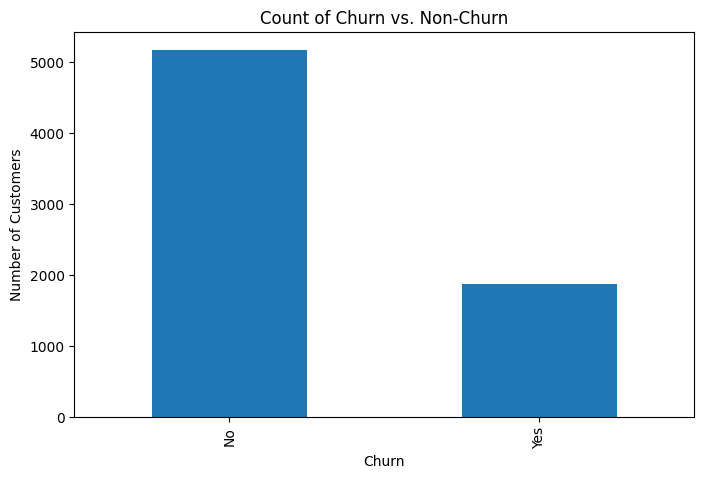

In [5]:
df['Churn'].value_counts().plot.bar()
plt.title("Count of Churn vs. Non-Churn")
plt.ylabel("Number of Customers")
plt.show()


## Numeric Feature Distributions


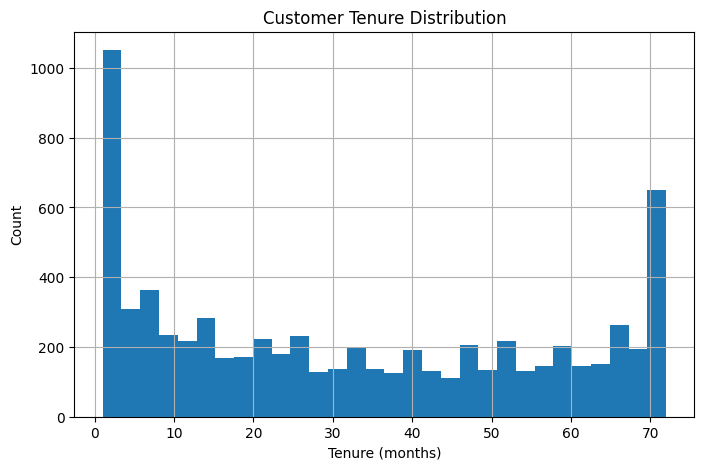

In [6]:
df['tenure'].hist(bins=30)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


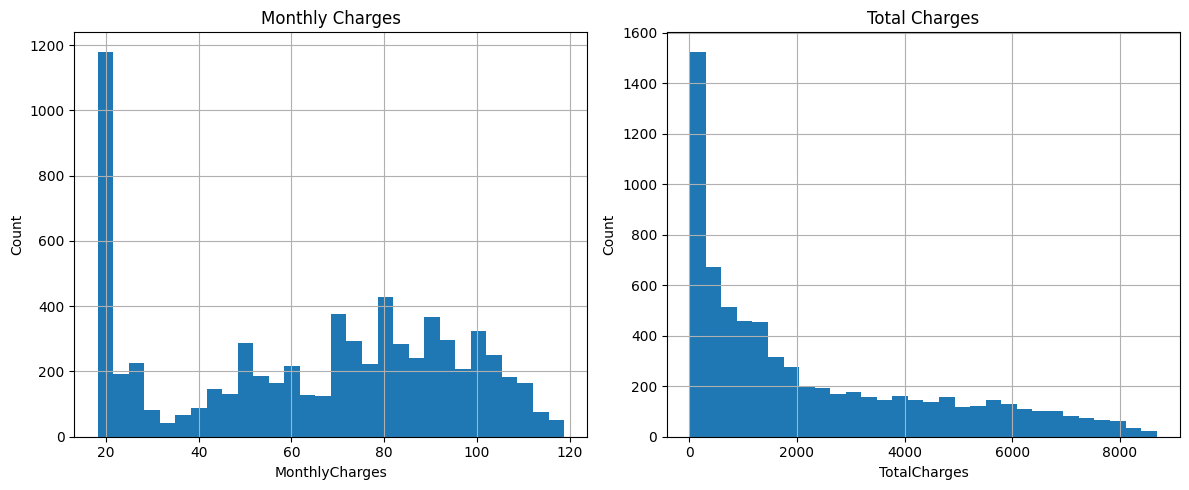

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
df['MonthlyCharges'].hist(bins=30, ax=axes[0])
axes[0].set_title("Monthly Charges")
axes[0].set_xlabel("MonthlyCharges")
axes[0].set_ylabel("Count")

df['TotalCharges'].hist(bins=30, ax=axes[1])
axes[1].set_title("Total Charges")
axes[1].set_xlabel("TotalCharges")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


## Some Categorical Feature Counts


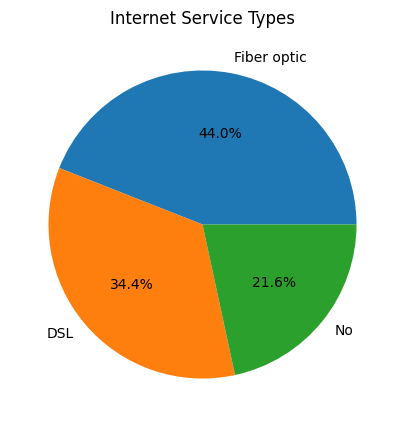

In [8]:
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Internet Service Types")
plt.ylabel("")  # hide y-label
plt.show()


## Feature Engineering Preview


In [9]:
# Create tenure_group and num_services as in your pipeline
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0,12,24,48,72],
                            labels=['0-12','13-24','25-48','49-72'])

services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df['num_services'] = df[services].apply(lambda x: (x=='Yes').sum(), axis=1)

# Show the new columns
df[['tenure_group','num_services']].head()


,tenure_group,num_services
0,0-12,1
1,25-48,3
2,0-12,3
3,25-48,3
4,0-12,1


## Correlation Heatmap of Numeric Features


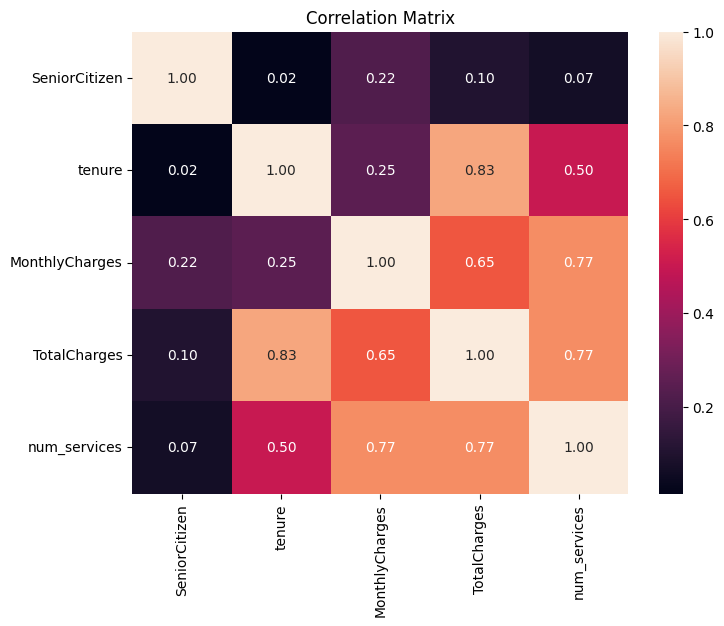

In [10]:
import seaborn as sns

num_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## Conclusion

- We saw that …
- Next: feed these features into our modeling pipeline (in `model_training.py`)
